# Cifar-100 이미지 분류
## 전체 데이터중 일부분만 사용
### 모델 출처: [Divya Agarwal](https://github.com/divya025/Cifar100)

#### CIFAR100 데이터 로드

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='fine')

In [2]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [3]:
y_train[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

#### 데이터 확인

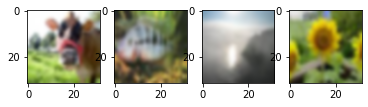

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [5]:
y_train[0], y_train[4], y_train[8], y_train[12]

(array([19]), array([1]), array([23]), array([82]))

#### 자료형 변환 및 스케일링
- X: 실수형으로 정규화
- Y: 1-hot encoding


In [6]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [7]:
Y_train = tf.keras.utils.to_categorical(y_train, 100)
Y_test = tf.keras.utils.to_categorical(y_test, 100)
Y_train[:2]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)

#### 자료의 일부만 사용하여 모델 테스트 하기

In [8]:
from sklearn.model_selection import train_test_split

seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X_test, Y_test, 
                                                    test_size=.2, random_state=seed)

#### 모형 구현

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import Activation
import numpy as np

np.random.seed(0)

In [10]:
model = Sequential()

# Input Layer
model.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:]))
model.add(Activation('relu'))
# MAXPOOL Layer 1
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# CONV2D Layer 2
model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Activation('relu'))
# Add a dropout of 10%
model.add(Dropout(0.1))
# CONV2D Layer 3
model.add(Conv2D(128, (3,3), padding='same'))
model.add(Activation('relu'))
# MAXPOOL Layer 3
model.add(MaxPooling2D(pool_size=(2,2)))
# Add dropout of 25%
model.add(Dropout(0.25))
# flatten 
model.add(Flatten())
# Fully Connected Layer 1
model.add(Dense(512))
model.add(Activation('relu'))
# Adding a dropout of 50%
model.add(Dropout(0.5))
# Output Layer (Fully Connected Layer 2) 
model.add(Dense(100))
model.add(Activation('softmax'))
          
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
activation_1 (Activation)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [11]:
opt = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [13]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=50,
                   validation_data=(X_test, Y_test), verbose=1)

Epoch 1/100
160/160 [==============================] - 2s 13ms/step - loss: 4.6057 - accuracy: 0.0111 - val_loss: 4.5837 - val_accuracy: 0.0170
Epoch 2/100
160/160 [==============================] - 2s 11ms/step - loss: 4.5219 - accuracy: 0.0266 - val_loss: 4.4157 - val_accuracy: 0.0390
Epoch 3/100
160/160 [==============================] - 2s 11ms/step - loss: 4.3903 - accuracy: 0.0342 - val_loss: 4.2775 - val_accuracy: 0.0565
Epoch 4/100
160/160 [==============================] - 2s 11ms/step - loss: 4.2916 - accuracy: 0.0471 - val_loss: 4.1845 - val_accuracy: 0.0765
Epoch 5/100
160/160 [==============================] - 2s 11ms/step - loss: 4.2066 - accuracy: 0.0591 - val_loss: 4.0710 - val_accuracy: 0.0835
Epoch 6/100
160/160 [==============================] - 2s 11ms/step - loss: 4.1115 - accuracy: 0.0694 - val_loss: 3.9491 - val_accuracy: 0.1155
Epoch 7/100
160/160 [==============================] - 2s 11ms/step - loss: 4.0123 - accuracy: 0.0909 - val_loss: 3.8901 - val_accuracy:

160/160 [==============================] - 2s 10ms/step - loss: 2.1136 - accuracy: 0.4354 - val_loss: 2.9952 - val_accuracy: 0.2895
Epoch 58/100
160/160 [==============================] - 2s 10ms/step - loss: 2.0920 - accuracy: 0.4491 - val_loss: 3.0059 - val_accuracy: 0.2905
Epoch 59/100
160/160 [==============================] - 2s 10ms/step - loss: 2.0751 - accuracy: 0.4467 - val_loss: 3.0057 - val_accuracy: 0.2895
Epoch 60/100
160/160 [==============================] - 2s 10ms/step - loss: 2.0304 - accuracy: 0.4484 - val_loss: 3.0162 - val_accuracy: 0.2880
Epoch 61/100
160/160 [==============================] - 2s 10ms/step - loss: 2.0129 - accuracy: 0.4556 - val_loss: 3.0044 - val_accuracy: 0.2910
Epoch 62/100
160/160 [==============================] - 2s 10ms/step - loss: 1.9820 - accuracy: 0.4640 - val_loss: 2.9991 - val_accuracy: 0.2915
Epoch 63/100
160/160 [==============================] - 2s 10ms/step - loss: 1.9377 - accuracy: 0.4691 - val_loss: 2.9969 - val_accuracy: 0.292

In [14]:
# 테스트 정확도 출력
print("\n Test Accuracy : %.4f" % (model.evaluate(X_test, Y_test)[1]))

63/63 [==============================] - 0s 6ms/step - loss: 3.2202 - accuracy: 0.2960

 Test Accuracy : 0.2960


In [17]:
# 테스트셋
y_vloss = history.history['val_loss']
y_vacc = history.history['val_accuracy']
# 학습셋
y_loss = history.history['loss']
y_acc = history.history['accuracy']

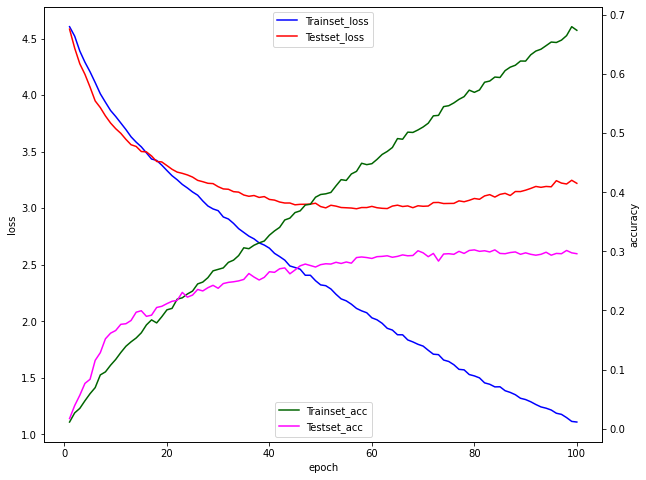

In [18]:
# 그래프로 표현
# accuracy와 loss의 scale이 다른데 한번에 표현할 수 있다.
x_len = np.arange(1, len(y_loss)+1)
fig, ax0 = plt.subplots(figsize=(10,8))
ax1 = ax0.twinx()
ax0.plot(x_len, y_loss, c="blue", label='Trainset_loss')
ax0.plot(x_len, y_vloss, c="red", label='Testset_loss')
ax0.set_ylabel('loss')
ax1.plot(x_len, y_acc, c="darkgreen", label='Trainset_acc')
ax1.plot(x_len, y_vacc, c="magenta", label='Testset_acc')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('epoch')
ax0.legend(loc='upper center')
ax1.legend(loc='lower center')
plt.show()